In [1]:
library(cowplot)
library(dplyr)
library(gridExtra)
library(tidyverse)
library(repr)
library(infer)
library(repr)
DsSalary <- read_csv("/home/jupyter/project/Data_Science_Jobs_Salaries.csv")



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ readr   2.1.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()

Rows: 245 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): experience_level, employment_type, job_title, salary_currency, empl...
dbl (4): work_year, salary, salary_in_usd, remote_ratio

ℹ Use `spec()` 

In [2]:
head(DsSalary)

work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
2021,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2021,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
2021,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
2021,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S
2021,SE,FT,Data Analytics Manager,120000,USD,120000,US,100,US,M


In [3]:
clean_DsSalary <- DsSalary %>%
                  filter(!is.na(salary_in_usd&remote_ratio),
                         remote_ratio %in% c(0, 100)) %>%
                  select(remote_ratio, salary_in_usd)
head(clean_DsSalary)

remote_ratio,salary_in_usd
<dbl>,<dbl>
100,68428
0,85000
100,125000
100,120000
0,450000
100,144000


In [5]:
remote_df <- clean_DsSalary %>%
                  filter(remote_ratio == 100) %>%
                  select(salary_in_usd)

remote_mean_median <- remote_df %>%
                        summarise(mean = mean(salary_in_usd),
                                  median = median(salary_in_usd))
remote_mean_median

mean,median
<dbl>,<dbl>
115107.7,1e+05


In [6]:
no_remote_df <- clean_DsSalary %>%
                filter(remote_ratio == 0) %>%
                select(salary_in_usd)

no_remote_mean_median <- no_remote_df %>%
                         summarise(mean = mean(salary_in_usd),
                                   median = median(salary_in_usd))
no_remote_mean_median

mean,median
<dbl>,<dbl>
84962.45,69721


Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


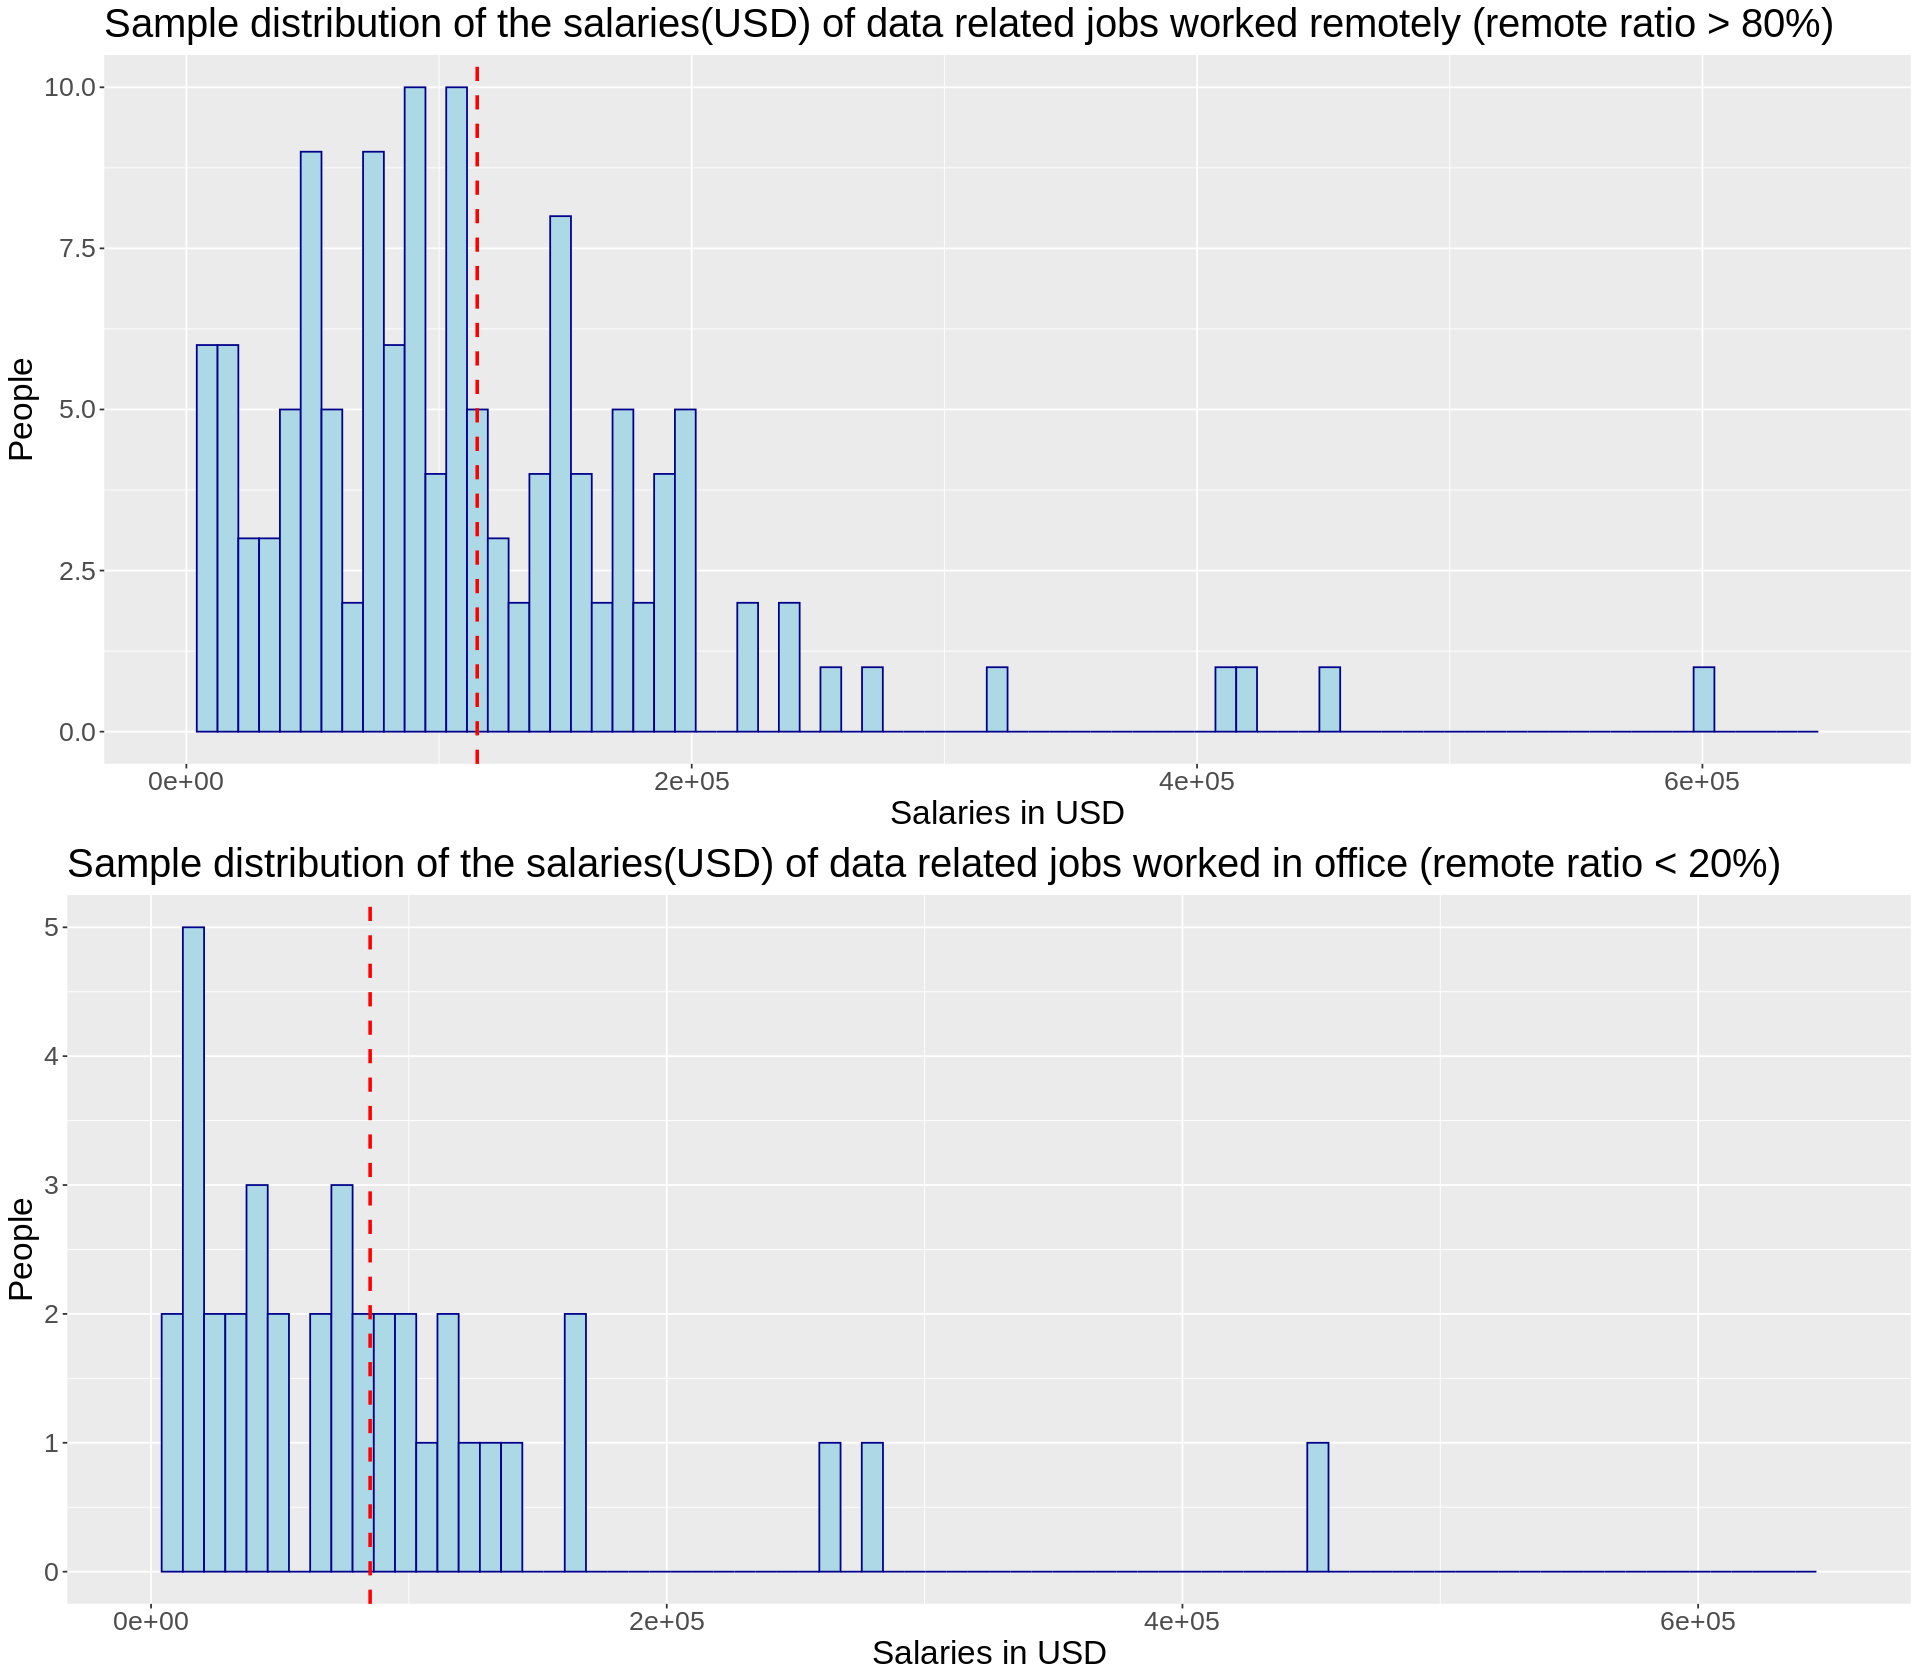

In [54]:
remote_distribution <- remote_df %>%
                          ggplot(aes(x=salary_in_usd)) +
                          geom_histogram(bins=80, color="darkblue", fill="lightblue") +
                          geom_vline(xintercept = remote_mean_median$mean, color="red", linetype="dashed", size = 1)+
                          ggtitle("Sample distribution of the salaries(USD) of data related jobs worked remotely (remote ratio > 80%)")+
                          labs(x="Salaries in USD",
                               y="People")+
                          theme(text = element_text(size=20)) 

no_remote_distribution <- no_remote_df %>%
                          ggplot(aes(x=salary_in_usd)) +
                          geom_histogram(bins=80, color="darkblue", fill="lightblue") +
                          geom_vline(xintercept = no_remote_mean_median$mean, color="red", linetype="dashed", size = 1)+
                          ggtitle("Sample distribution of the salaries(USD) of data related jobs worked in office (remote ratio < 20%)")+
                          labs(x="Salaries in USD",
                               y="People")+
                          theme(text = element_text(size=20))

options(repr.plot.width = 16, repr.plot.height = 14)

mean_plot_row <- plot_grid(remote_distribution+
                           scale_x_continuous(limits = c(0, 6.5e+05)),
                           no_remote_distribution+
                           scale_x_continuous(limits = c(0, 6.5e+05)),
                           nrow = 2)
mean_plot_row

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


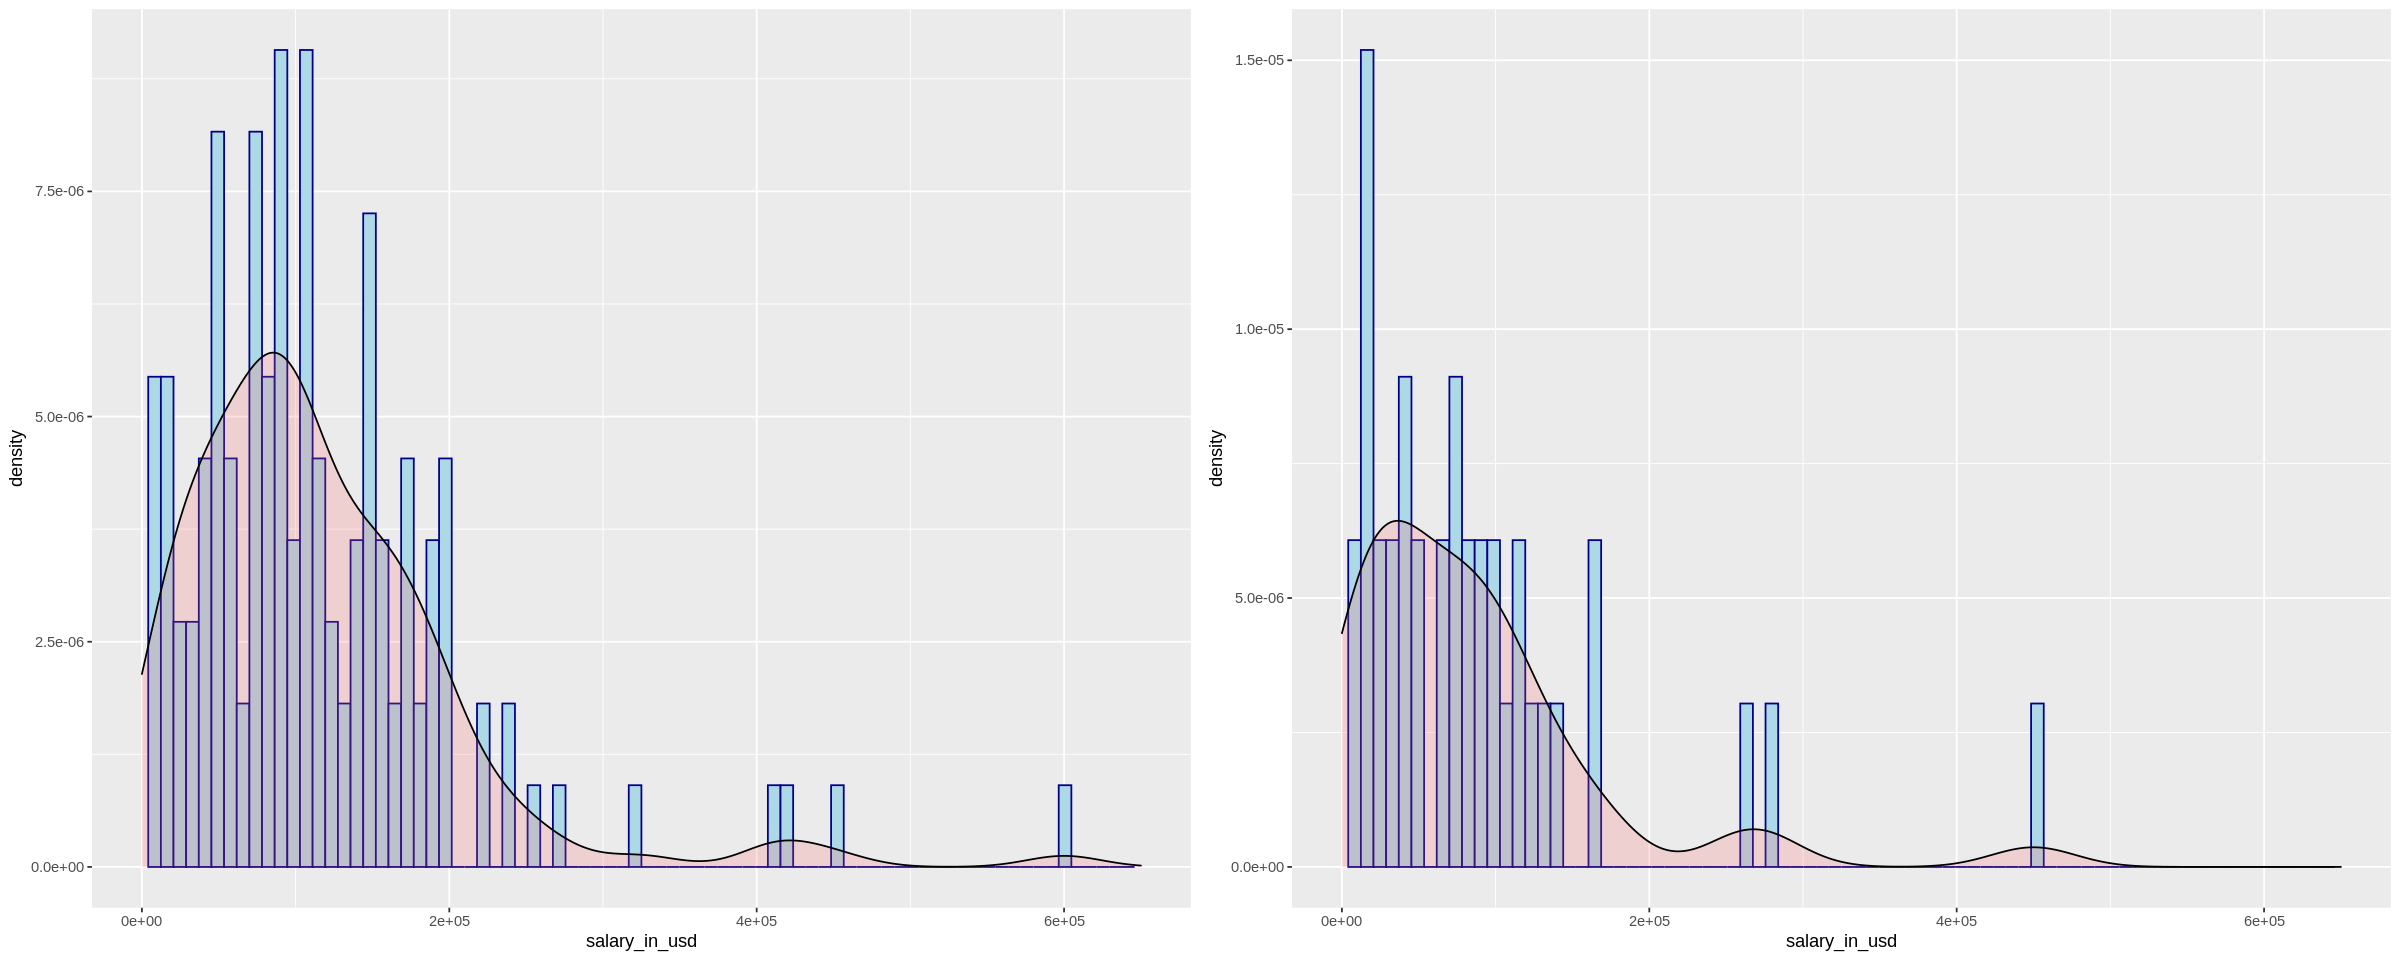

In [52]:
remote_density <- remote_df %>%
                          ggplot(aes(x=salary_in_usd)) +
                          geom_histogram(aes(y=..density..), bins=80, color="darkblue", fill="lightblue") +
                          geom_density(alpha=.2, fill="#FF6666")
no_remote_density <- no_remote_df %>%
                          ggplot(aes(x=salary_in_usd)) +
                          geom_histogram(aes(y=..density..), bins=80, color="darkblue", fill="lightblue") +
                          geom_density(alpha=.2, fill="#FF6666") 

options(repr.plot.width = 20, repr.plot.height = 8)
density_plot <- plot_grid(remote_density+
                           scale_x_continuous(limits = c(0, 6.5e+05)),
                           no_remote_density+
                           scale_x_continuous(limits = c(0, 6.5e+05)),
                           ncol = 2)
density_plot